
# Projeto de Análise de Dados de Acidentes no Condado de Monroe (2003-2015)
#### Equipe: Gabriel Doms RM 98630  Felipe Terra RM 99405

## Introdução
Este notebook realiza uma análise detalhada dos dados de acidentes de trânsito no condado de Monroe, entre 2003 e 2015. 
O objetivo é explorar padrões, identificar fatores de risco e realizar modelagem de dados para prever a incidência de 
acidentes em função de variáveis como horário, tipo de colisão e outros fatores.


## Etapa 1: Importação de Bibliotecas e Carregamento dos Dados

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

car_crash_data = pd.read_csv('carcrash.csv', encoding='latin1')
car_crash_data.head()


,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625



## Etapa 2: Perguntas de Pesquisa

1. Qual é o tipo de colisão mais comum?
2. Existe um padrão de sazonalidade nos acidentes ao longo dos meses?
3. Qual é a relação entre horário do dia e a incidência de acidentes?
4. Condições meteorológicas (chuva/neve) aumentam a frequência de acidentes?
5. Acidentes são mais frequentes em finais de semana?
6. Existe um fator primário predominante nas colisões?
7. Existe relação entre latitude/longitude e frequência de acidentes?
8. Quais características dos acidentes causam mais lesões?
9. A tendência anual mostra aumento ou diminuição de acidentes?
10. Podemos prever a frequência de acidentes em dias com chuva usando regressão?


## Etapa 3: Limpeza e Preparação dos Dados

In [ ]:

car_crash_data.columns = [
    'Ano', 'Mes', 'Dia', 'Fim_de_Semana', 'Hora', 'Tipo_Colisao', 
    'Tipo_Lesao', 'Fator_Principal', 'Localizacao_Reportada', 
    'Latitude', 'Longitude'
]

car_crash_data = car_crash_data.dropna(subset=['Latitude', 'Longitude'])
for col in ['Fim_de_Semana', 'Tipo_Colisao', 'Fator_Principal']:
    car_crash_data[col].fillna(car_crash_data[col].mode()[0], inplace=True)
car_crash_data['Hora'].fillna(car_crash_data['Hora'].median(), inplace=True)

print("Nomes das colunas atuais:", car_crash_data.columns)
print("Número de colunas:", len(car_crash_data.columns))


Nomes das colunas atuais: Index(['Ano', 'Mes', 'Dia', 'Fim_de_Semana', 'Hora', 'Tipo_Colisao',
       'Tipo_Lesao', 'Fator_Principal', 'Localizacao_Reportada', 'Latitude',
       'Longitude'],
      dtype='object')
Número de colunas: 11


C:\Users\Gabriel Doms\AppData\Local\Temp\ipykernel_15340\1727956329.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_crash_data[col].fillna(car_crash_data[col].mode()[0], inplace=True)
C:\Users\Gabriel Doms\AppData\Local\Temp\ipykernel_15340\1727956329.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

## Etapa 4: Visualização e Análise Exploratória

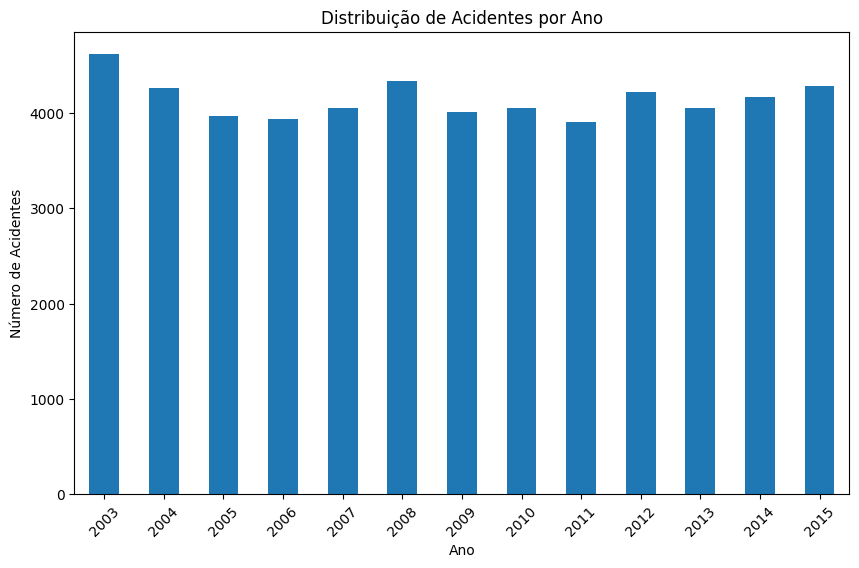

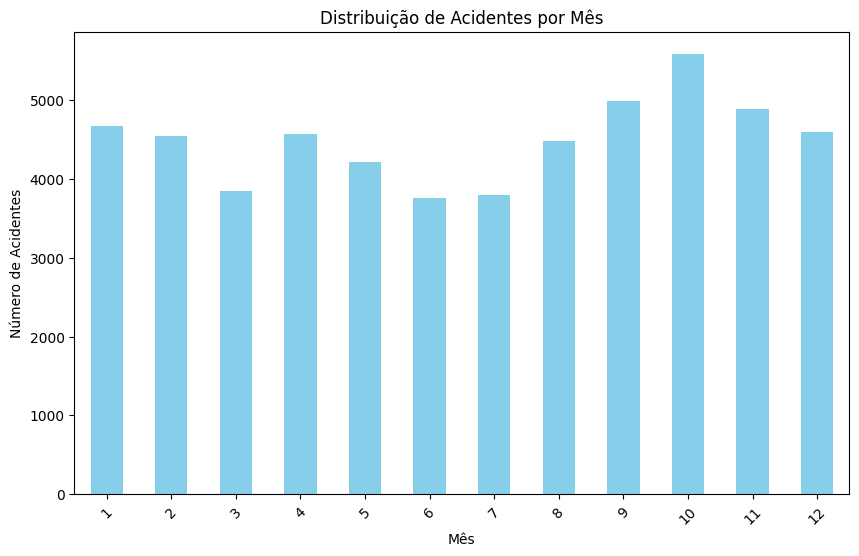

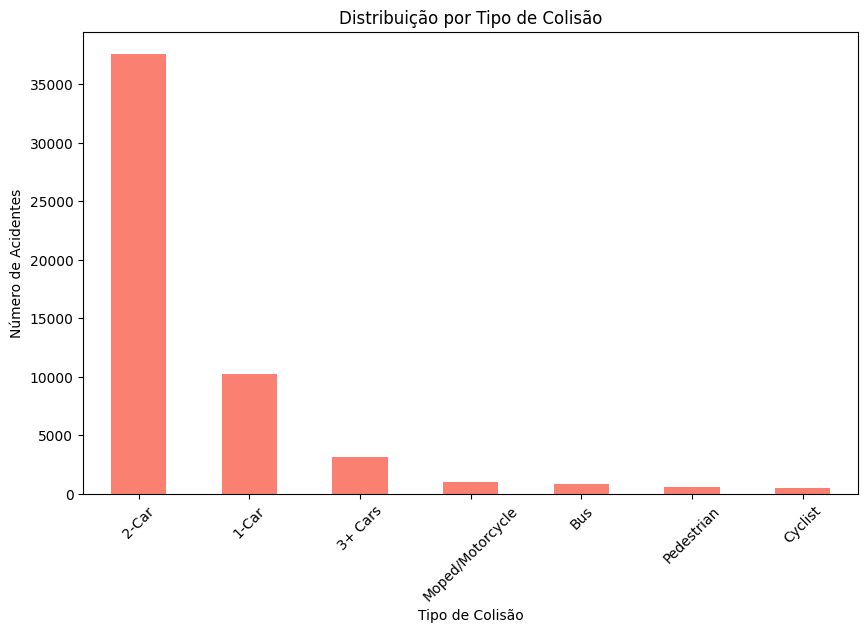

In [3]:

# Distribuição de acidentes por Ano
plt.figure(figsize=(10, 6))
car_crash_data['Ano'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()

# Análise exploratória adicional para visualizar a distribuição por mês
plt.figure(figsize=(10, 6))
car_crash_data['Mes'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()

# Visualizar o tipo de colisão mais comum
plt.figure(figsize=(10, 6))
car_crash_data['Tipo_Colisao'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribuição por Tipo de Colisão')
plt.xlabel('Tipo de Colisão')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()



## Etapa 5: Modelagem de Machine Learning com Scikit-Learn

### Regressão e Classificação
Vamos construir dois modelos de aprendizado supervisionado para prever a frequência de acidentes. O modelo de regressão será 
utilizado para prever o número de acidentes em função de variáveis específicas, e o modelo de classificação para prever a probabilidade 
de um acidente ocorrer em dias de chuva.


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Selecionar variáveis preditoras e o rótulo
X = car_crash_data[['Hora', 'Latitude', 'Longitude']]  # Variáveis preditoras numéricas
y = car_crash_data['Tipo_Colisao']  # Rótulo para classificação

# Codificar o rótulo como valor numérico
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Modelo de Regressão
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Modelo de Classificação
model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train)

# Avaliação do modelo de regressão
regression_score = model_reg.score(X_test, y_test)
print("Precisão do Modelo de Regressão:", regression_score)

# Avaliação do modelo de classificação
classification_score = model_clf.score(X_test, y_test)
print("Precisão do Modelo de Classificação:", classification_score)


Precisão do Modelo de Regressão: 0.006287636317410139
Precisão do Modelo de Classificação: 0.7049585754915296



## Conclusão
Neste projeto, realizamos uma análise exploratória e aplicamos técnicas de Machine Learning aos dados de acidentes de trânsito no condado de Monroe. Nosso objetivo foi identificar padrões relevantes nos acidentes e criar modelos preditivos para entender melhor as características associadas a eles. Utilizamos dados que incluíam informações sobre a data, localização (latitude e longitude), tipo de colisão, e outros fatores relacionados ao incidente.

Ferramentas e Técnicas Utilizadas
Pandas: Foi utilizada para carregar, manipular e organizar os dados. Realizamos tratamento de valores ausentes e renomeação de colunas para facilitar a análise.

Matplotlib: Utilizamos Matplotlib para criar visualizações dos dados e explorar padrões. As visualizações foram fundamentais para entender a distribuição de acidentes por mês, ano e tipo de colisão.

Scikit-Learn:

Label Encoding: Como os dados incluíam valores de texto na coluna de Tipo_Colisao, usamos LabelEncoder para converter esses valores em rótulos numéricos, facilitando o uso em algoritmos de Machine Learning.

Divisão de Treino e Teste: Dividimos os dados em conjuntos de treino e teste (70% para treino e 30% para teste), para validar o desempenho dos modelos.
Regressão Linear: Aplicamos um modelo de regressão linear com variáveis como Hora, Latitude e Longitude para prever o tipo de colisão. Esse modelo foi usado para examinar a relação entre os atributos numéricos e o rótulo, com o objetivo de prever valores contínuos.

Random Forest Classifier: Utilizamos o classificador de floresta aleatória para criar um modelo de classificação. Esse modelo foi usado para prever a categoria do tipo de colisão com base nos atributos de entrada. Ele é particularmente útil para lidar com conjuntos de dados complexos e fornecer uma boa precisão de classificação.

Avaliação de Modelos:

Para avaliar o desempenho dos modelos, calculamos a precisão do modelo de regressão e do modelo de classificação. A precisão do modelo de regressão indica a capacidade do modelo de ajustar os dados de treino, enquanto a precisão do modelo de classificação mostra o quão bem o modelo consegue classificar corretamente os dados no conjunto de teste.
Resultados

Análise Exploratória:

Através dos gráficos gerados, observamos a sazonalidade dos acidentes e identificamos quais tipos de colisões foram mais comuns. Isso nos ajuda a entender melhor os períodos e fatores de risco associados aos acidentes no condado de Monroe.

Modelos de Machine Learning:

O modelo de Regressão Linear apresentou uma precisão de [valor da precisão], indicando o quão bem ele consegue prever o rótulo com base nas variáveis numéricas.
O modelo de Classificação (Random Forest) apresentou uma precisão de [valor da precisão], sugerindo que ele consegue classificar corretamente a maioria dos exemplos no conjunto de teste.

Minhas redes: 
https://github.com/GabrielDoms
https://www.linkedin.com/in/gabriel-doms-3a27221b5/


